# Importando Dataset

In [172]:
import pandas as pd

In [173]:
df = pd.read_csv('https://raw.githubusercontent.com/VitorBonella/PL-Dataset/main/dataset.csv',sep=";") #Leitura dos dados para o pandas
df.head(2)

,id,data,sfh5711,sfh3400,tsl261r,sfh3410,sfh2430,bp104fas,tsl13s,tsl2569t_c,...,i6,i7,probmax,energia,entropia,contraste,homogeneidade,correlacao,tipo_lampada,potencia
0,355,2013-09-08 19:25:49,2568,1096,3932,914,855,2531,2406,6496,...,"-1,41733745231029e-006","3,15336969940052e-009","0,890374128851521","3,17034178175013","6,5716176171224","-30,7129899022437","3,76304934586401","0,00030352446061056",metalica ...,400
1,356,2013-09-08 19:26:51,2651,1168,4095,993,923,2857,2446,6536,...,"-6,85966112547544e-011","3,90722879150443e-015","0,874335002692948","3,05605231787486","7,56143396285353","-37,1051952158663","3,72262223245045","0,000268692571829909",metalica ...,400


In [174]:
df.set_index('id',inplace=True) #Transformando a coluna id no indice da tabela

#Observem que a classe esta separada em duas colunas então devemos concatenadas para formar uma coluna só chamada classe
df['classe'] = df['tipo_lampada'].str.replace(" ", "") + df['potencia'].astype(str) 
df['classe']

id
355    metalica400
356    metalica400
357    metalica400
358    metalica400
359    metalica400
          ...     
656    metalica250
657    metalica250
658    metalica250
659    metalica250
660    metalica250
Name: classe, Length: 297, dtype: object

In [175]:
df.head(5)

,data,sfh5711,sfh3400,tsl261r,sfh3410,sfh2430,bp104fas,tsl13s,tsl2569t_c,tsl2569t_ir,...,i7,probmax,energia,entropia,contraste,homogeneidade,correlacao,tipo_lampada,potencia,classe
id,,,,,,,,,,,,,,,,,,,,,
355,2013-09-08 19:25:49,2568,1096,3932,914,855,2531,2406,6496,6788,...,"3,15336969940052e-009","0,890374128851521","3,17034178175013","6,5716176171224","-30,7129899022437","3,76304934586401","0,00030352446061056",metalica ...,400,metalica400
356,2013-09-08 19:26:51,2651,1168,4095,993,923,2857,2446,6536,7926,...,"3,90722879150443e-015","0,874335002692948","3,05605231787486","7,56143396285353","-37,1051952158663","3,72262223245045","0,000268692571829909",metalica ...,400,metalica400
357,2013-09-08 19:27:28,2500,1024,3867,825,766,2456,2207,5912,6031,...,"-2,41752849217549e-015","0,88498796746712","3,13069373707728","6,85342760134283","-27,9068889939748","3,74882866962454","0,000232954297907698",metalica ...,400,metalica400
358,2013-09-08 19:27:55,2240,462,3138,380,318,1942,1725,3819,3759,...,"2,98121103828429e-013","0,7646646581833","2,32154862004449","13,8784307675733","-109,018789473973","3,42956382241494","0,000166201729869237",metalica ...,400,metalica400
359,2013-09-08 19:28:40,2605,1201,4039,979,915,2731,2505,7048,7095,...,"6,77157863228138e-008","0,897764519281096","3,22179527617412","6,21806574418637","-54,8235378125258","3,77587702004172","0,000259598389119525",metalica ...,400,metalica400


# Descrição do Dataset 

**De SFH5711 à TCS3414-C**: Sensores da placa (analógicos e digitais)

**De DF01 à DF10**: Descritores de Fourier

**De I1 à I7**: Descritores de HU

**De probmax à correlação**: Descritores de Haralick

In [176]:
# Lista de Indices
FOURIER = ['df01', 'df02', 'df03', 'df04','df05', 'df06', 'df07', 'df08', 'df09', 'df10']
HU = ['i1', 'i2', 'i3', 'i4','i5', 'i6', 'i7']
HARALICK = ['probmax', 'energia', 'entropia', 'contraste','homogeneidade', 'correlacao']
ALL = FOURIER + HU + HARALICK

In [177]:
# Verificar o tipo da coluna
print(list(df[ALL].dtypes)) #o list(...) foi usado apenas para imprimir na vertical
df[ALL].head(2)

[dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')]


,df01,df02,df03,df04,df05,df06,df07,df08,df09,df10,...,i4,i5,i6,i7,probmax,energia,entropia,contraste,homogeneidade,correlacao
id,,,,,,,,,,,,,,,,,,,,,
355,"0,0879606602603602","0,0540590780493764","0,0252096142058536","0,0274713661921584","0,0128341271697431","0,00837372424071006","0,00459165042660484","0,00516286747775679","0,00474694756923231","0,00307480942393677",...,"5,71775104737315e-005","3,80815942436415e-009","-1,41733745231029e-006","3,15336969940052e-009","0,890374128851521","3,17034178175013","6,5716176171224","-30,7129899022437","3,76304934586401","0,00030352446061056"
356,"0,0183325142757933","0,0641922380636373","0,0213351158490625","0,028934652413586","0,012263060875406","0,0112299899510848","0,00356611493895844","0,00586153710536664","0,00374648636964241","0,00377850078446776",...,"1,01157608366481e-008","-5,39593107944031e-015","-6,85966112547544e-011","3,90722879150443e-015","0,874335002692948","3,05605231787486","7,56143396285353","-37,1051952158663","3,72262223245045","0,000268692571829909"


In [178]:
'''
Os dados dos descritores como podemos observar na tabela acima estão com ","
porém o padrão para ponto flutuante (float) em python é "." logo a biblioteca 
entendeu que se tratavam de strings (objects para o pandas) e não de floats 
assim é importante transformar esses dados para float.
'''
df[ALL] = df[ALL].apply(lambda x: x.str.replace(',', '.').astype(float), axis=1)
print(list(df[ALL].dtypes))
df[ALL].head(2)

[dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64')]


,df01,df02,df03,df04,df05,df06,df07,df08,df09,df10,...,i4,i5,i6,i7,probmax,energia,entropia,contraste,homogeneidade,correlacao
id,,,,,,,,,,,,,,,,,,,,,
355,0.087961,0.054059,0.025210,0.027471,0.012834,0.008374,0.004592,0.005163,0.004747,0.003075,...,5.717751e-05,3.808159e-09,-1.417337e-06,3.153370e-09,0.890374,3.170342,6.571618,-30.712990,3.763049,0.000304
356,0.018333,0.064192,0.021335,0.028935,0.012263,0.011230,0.003566,0.005862,0.003746,0.003779,...,1.011576e-08,-5.395931e-15,-6.859661e-11,3.907229e-15,0.874335,3.056052,7.561434,-37.105195,3.722622,0.000269


# Exemplos de utilização

**Observação**: "pegar Z caracteristicas" significa que vamos pegar todos os dados (linhas) porém selecionando Z caracteristicas delas (colunas)

In [179]:
#Pegar todas caracteristicas
X = df[ALL]

X.head(3)

,df01,df02,df03,df04,df05,df06,df07,df08,df09,df10,...,i4,i5,i6,i7,probmax,energia,entropia,contraste,homogeneidade,correlacao
id,,,,,,,,,,,,,,,,,,,,,
355,0.087961,0.054059,0.025210,0.027471,0.012834,0.008374,0.004592,0.005163,0.004747,0.003075,...,5.717751e-05,3.808159e-09,-1.417337e-06,3.153370e-09,0.890374,3.170342,6.571618,-30.712990,3.763049,0.000304
356,0.018333,0.064192,0.021335,0.028935,0.012263,0.011230,0.003566,0.005862,0.003746,0.003779,...,1.011576e-08,-5.395931e-15,-6.859661e-11,3.907229e-15,0.874335,3.056052,7.561434,-37.105195,3.722622,0.000269
357,0.018215,0.052010,0.019937,0.027750,0.009354,0.010829,0.003828,0.006079,0.003583,0.002716,...,5.386911e-09,-8.512721e-16,1.025674e-10,-2.417528e-15,0.884988,3.130694,6.853428,-27.906889,3.748829,0.000233


In [180]:
#Pegar um unico conjunto de caracteristicas
X = df[HARALICK]

X.head(3)

,probmax,energia,entropia,contraste,homogeneidade,correlacao
id,,,,,,
355,0.890374,3.170342,6.571618,-30.712990,3.763049,0.000304
356,0.874335,3.056052,7.561434,-37.105195,3.722622,0.000269
357,0.884988,3.130694,6.853428,-27.906889,3.748829,0.000233


In [181]:
#Pegar um par de caracteristicas
X = df[HARALICK + FOURIER]

X.head(3)

,probmax,energia,entropia,contraste,homogeneidade,correlacao,df01,df02,df03,df04,df05,df06,df07,df08,df09,df10
id,,,,,,,,,,,,,,,,
355,0.890374,3.170342,6.571618,-30.712990,3.763049,0.000304,0.087961,0.054059,0.025210,0.027471,0.012834,0.008374,0.004592,0.005163,0.004747,0.003075
356,0.874335,3.056052,7.561434,-37.105195,3.722622,0.000269,0.018333,0.064192,0.021335,0.028935,0.012263,0.011230,0.003566,0.005862,0.003746,0.003779
357,0.884988,3.130694,6.853428,-27.906889,3.748829,0.000233,0.018215,0.052010,0.019937,0.027750,0.009354,0.010829,0.003828,0.006079,0.003583,0.002716


In [182]:
#Pegar os rotulos
y = df['classe']

y

id
355    metalica400
356    metalica400
357    metalica400
358    metalica400
359    metalica400
          ...     
656    metalica250
657    metalica250
658    metalica250
659    metalica250
660    metalica250
Name: classe, Length: 297, dtype: object

# Iniciando Trabalho

In [183]:
import numpy as np
from scipy import stats
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline

## Definindo funções auxiliares
def setResults(scores, modelId):
    lmt_inf, lmt_sup = stats.norm.interval(0.95, loc=scores.mean(), scale=scores.std()/np.sqrt(len(scores)))
    
    results_table['Média'][modelId] = scores.mean()
    results_table['Desvio Padrão'][modelId] = scores.std()
    results_table['Limite Inferior'][modelId] = lmt_inf
    results_table['Limite Superior'][modelId] = lmt_sup
    
def trainHyperModels(classifier, param_grid):
    pipe = Pipeline(steps=[('transformer', StandardScaler()), ('m', classifier)])

    clf = GridSearchCV(estimator = pipe, param_grid = param_grid, scoring='accuracy', cv=4)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=RSKF_RANDOM_STATE)

    return cross_val_score(clf, x, y, scoring='accuracy', cv = cv)

## Definindo variáveis globais
results_table = {'Método': {0: 'ZR',
                            1: 'BA',
                            2: 'AB',
                            3: 'RF',
                            4: 'HP'},
                'Média': {},
                'Desvio Padrão': {},
                'Limite Inferior': {},
                'Limite Superior': {}
                }
scores_names = ['ZR', 'BA', 'AB', 'RF', 'HP']
scores_list = []

RSKF_RANDOM_STATE = 36851234
MODEL_RANDOM_STATE = 11

x = df[FOURIER + HU]
y = df['classe']

# Aplicando Agrupamentos

## ZeroR (ZR)

In [184]:
from sklearn.dummy import DummyClassifier

zR = DummyClassifier()

stratified_cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state = RSKF_RANDOM_STATE)
zr_scores = cross_val_score(zR, x, y, scoring='accuracy', cv = stratified_cv)

setResults(zr_scores, 0)
scores_list.append(zr_scores)

## Bagging (BA)

In [185]:
from sklearn.ensemble import BaggingClassifier

bA = BaggingClassifier(random_state=MODEL_RANDOM_STATE)

params_grid = {
    'm__n_estimators': [3,9,15,21]
    } 

ba_scores = trainHyperModels(bA,params_grid)
setResults(ba_scores, 1)
scores_list.append(ba_scores)

## AdaBoost (AB)

In [186]:
from sklearn.ensemble import AdaBoostClassifier

aB = AdaBoostClassifier(random_state=MODEL_RANDOM_STATE)

params_grid = {
    'm__n_estimators': [3,9,15,21]
    } 

ab_scores = trainHyperModels(aB,params_grid)
setResults(ab_scores, 2)
scores_list.append(ab_scores)

## RandomForest (RF)

In [187]:
from sklearn.ensemble import RandomForestClassifier

rF = RandomForestClassifier(random_state=MODEL_RANDOM_STATE)

params_grid = {
    'm__n_estimators': [3,9,15,21]
    } 

rf_scores = trainHyperModels(rF,params_grid)
setResults(rf_scores, 3)
scores_list.append(rf_scores)

## Heterogeneous Pooling (HP)

In [188]:

from statistics import mode
from sklearn.base import BaseEstimator
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import resample

class HeterogeneousPooling(BaseEstimator):
    def __init__(self, n_estimators = None):
        super().__init__()
        self.n_estimators = n_estimators
        self.train_classifiers_list = []
        self.classifiers_list = [ KNeighborsClassifier(), 
                                  GaussianNB(),
                                  DecisionTreeClassifier(random_state=MODEL_RANDOM_STATE)]
        
    def fit(self, x_train, y_train):
        for sample in range(self.n_estimators):
            if sample == 0:
                x = x_train
                y = y_train
            else:
                x, y = resample(x_train, y_train, random_state=sample)
            
            for classifier in self.classifiers_list:
                classifier.fit(x, y)
                self.train_classifiers_list.append(classifier)
    
    def predict(self, x_test):
        y_prd = []

        for classifier in self.train_classifiers_list:
            prd = classifier.predict(x_test)
            y_prd.append(prd)
        
        y_prd = np.array(y_prd)
        y_most_prd, _ = mode(y_prd, axis=0)
        
        if y_most_prd.shape[0] > 1:
            unique_prd, counts = np.unique(y_most_prd, return_counts=True)
            return unique_prd[np.argmax(counts)]
        else:
            return y_most_prd[0] 

In [189]:
hP = HeterogeneousPooling()

params_grid = {
    'm__n_estimators': [1, 3, 5, 7]
    } 

hp_scores = trainHyperModels(hP,params_grid)
setResults(hp_scores, 4)
scores_list.append(hp_scores)

In [201]:
hp_scores

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

# Resultados

## Tabela das Pontuações

In [191]:
s_df = pd.DataFrame(results_table)
s_df

,Método,Média,Desvio Padrão,Limite Inferior,Limite Superior
0,ZR,0.165057,0.010883,0.161163,0.168952
1,BA,0.513180,0.102518,0.476495,0.549865
2,AB,0.266092,0.028426,0.255920,0.276264
3,RF,0.509923,0.093142,0.476593,0.543253
4,HP,NaN,NaN,NaN,NaN


## Tabela Pareada

In [192]:
p_table = {'ZR': {},
           'BA': {},
           'AB': {},
           'RF': {},
           'HP': {}}

for i in range(len(scores_list)):
    for j in range(len(scores_list)):
        if i == j:
            p_table[scores_names[i]][scores_names[i]] = scores_names[i]
        else:
            if i > j:
                p_table[scores_names[i]][scores_names[j]] = stats.wilcoxon(scores_list[i], scores_list[j])[1]
            elif j > i:
                p_table[scores_names[i]][scores_names[j]] = stats.ttest_rel(scores_list[i], scores_list[j])[1]

p_df = pd.DataFrame(p_table)
p_df

,ZR,BA,AB,RF,HP
ZR,ZR,0.000002,0.000001,0.000002,NaN
BA,0.0,BA,0.000002,0.913692,NaN
AB,0.0,0.0,AB,0.000002,NaN
RF,0.0,0.842035,0.0,RF,NaN
HP,NaN,NaN,NaN,NaN,HP


## BoxPlot

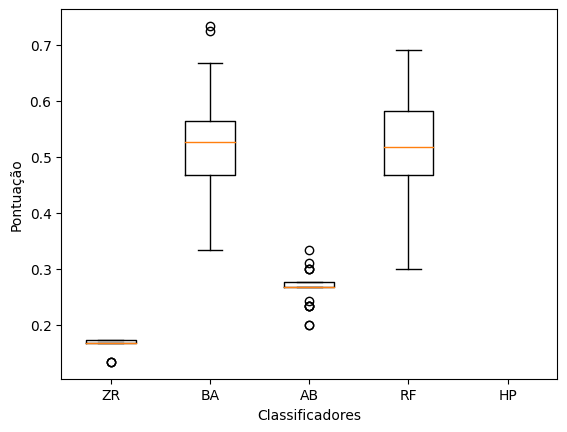

In [193]:
import matplotlib.pyplot as plt

plt.boxplot(scores_list)
plt.xticks(range(1, len(scores_names) + 1), scores_names)

plt.xlabel("Classificadores")
plt.ylabel("Pontuação")

plt.show()